# Exploração dos Dados — Cannoli Intelligence

## Leitura dos CSVs

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
order = pd.read_csv('Order.csv', sep=';')
campaign = pd.read_csv('Campaign.csv', sep=';')
campaign_queue = pd.read_csv('CampaignQueue.csv', sep=';')
customer = pd.read_csv('Customer.csv', sep=';')

print('Bases carregadas!')

Bases carregadas!


## Clientes (Customer)

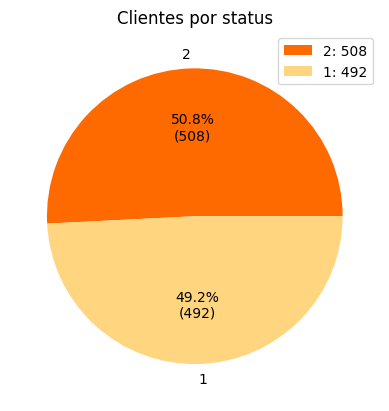

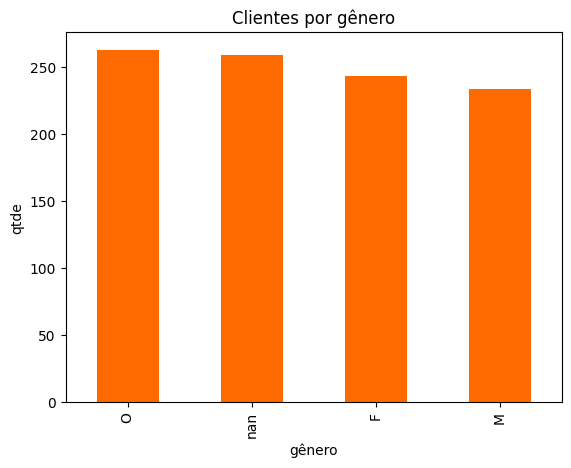

In [21]:
# Função simples para mostrar % e quantidade no gráfico de pizza
def mostrar_percentual(p):
    return f'{p:.1f}%\n({int(p*sum(s)/100)})'

# Mostra quantos clientes estão ativos ou inativos
if 'status' in customer.columns:
    s = customer['status'].value_counts(dropna=False)
    colors = ['#FF6A00', '#FFD580', '#999999', '#FFA64D']
    plt.figure()
    plt.pie(
        s, labels=s.index.astype(str),
        autopct=mostrar_percentual,
        colors=colors[:len(s)], textprops={'color':'black'}
    )
    plt.title('Clientes por status')
    plt.legend(labels=[f"{idx}: {val}" for idx, val in s.items()], loc='best')
    plt.show()

print("\n\n")

# Gráfico para ver a quantidade de cliente por genero
if 'gender' in customer.columns:
    s = customer['gender'].value_counts(dropna=False)
    s.plot(kind='bar', color='#FF6A00', title='Clientes por gênero')
    plt.xlabel('gênero'); plt.ylabel('qtde'); plt.show()


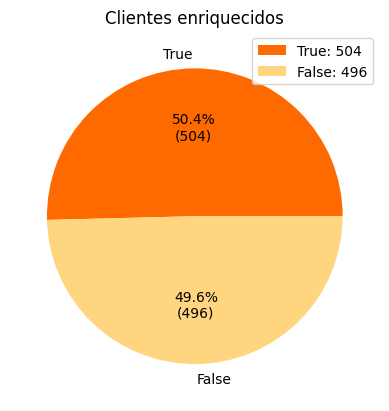

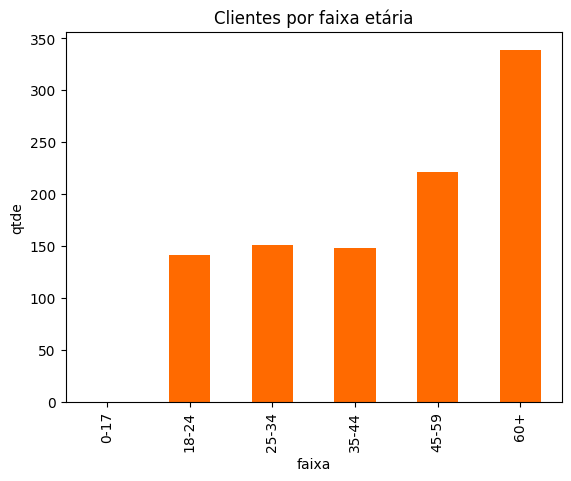

In [22]:
# Verificar quantos clientes têm os dados completos (enriquecidos)
if 'isEnriched' in customer.columns:
    s = customer['isEnriched'].value_counts(dropna=False)
    colors = ['#FF6A00', '#FFD580', '#999999']
    plt.figure()
    plt.pie(
        s, labels=s.index.astype(str),
        autopct=mostrar_percentual,
        colors=colors[:len(s)], textprops={'color':'black'}
    )
    plt.title('Clientes enriquecidos')
    plt.legend(labels=[f"{idx}: {val}" for idx, val in s.items()], loc='best')
    plt.show()

print("\n\n")

# Calcula a idade a partir da coluna 'dateOfBirth'
if 'dateOfBirth' in customer.columns:
    customer['dateOfBirth'] = pd.to_datetime(customer['dateOfBirth'], dayfirst=True, errors='coerce')
    customer['idade'] = (pd.to_datetime('now') - customer['dateOfBirth']).dt.days // 365

    # Faixas etárias para agrupar os clientes (ex: 18-24, 25-34 e entre outros)
    bins = [0,17,24,34,44,59,200]
    labels = ['0-17','18-24','25-34','35-44','45-59','60+']
    customer['faixa_etaria'] = pd.cut(customer['idade'], bins=bins, labels=labels, right=True)

    # Gráfico para mostrar quantos clientes tem em cada faixa etária
    customer['faixa_etaria'].value_counts().reindex(labels).plot(kind='bar', color='#FF6A00', title='Clientes por faixa etária')
    plt.xlabel('faixa'); plt.ylabel('qtde'); plt.show()
else:
    print("A coluna 'dateOfBirth' não foi encontrada para calcular a idade.")

## Campanhas (Campaign)

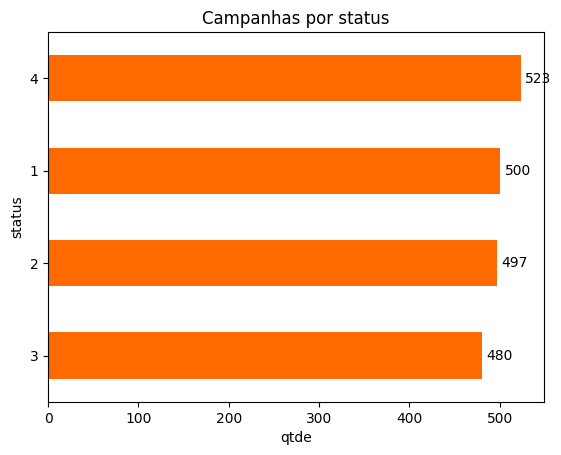

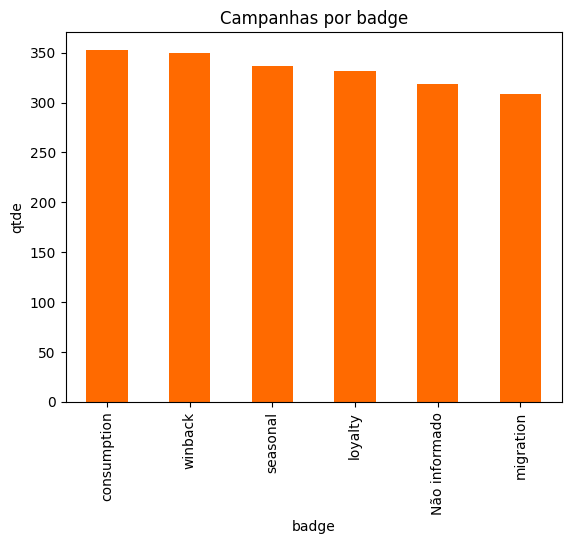

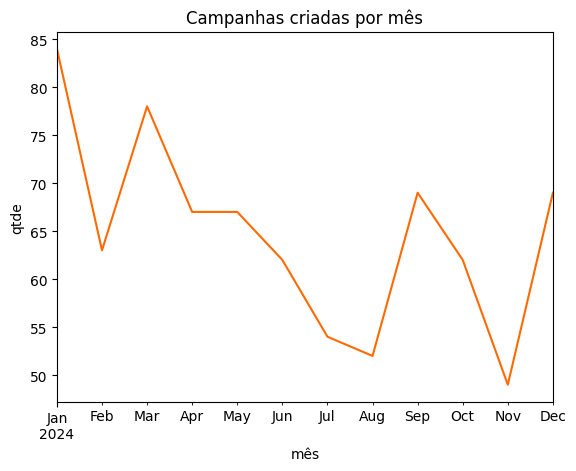

In [14]:
# Grafico de Barras horizontais para mostrar a quantidade de Campanhas por status
if 'status' in campaign.columns:
    s = campaign['status'].value_counts(dropna=False).sort_values()
    ax = s.plot(kind='barh', color='#FF6A00', title='Campanhas por status')
    for i, v in enumerate(s.values):
        ax.text(v + max(s.values)*0.01, i, str(v), va='center')
    plt.xlabel('qtde'); plt.ylabel('status'); plt.show()

print("\n\n")

# Mostrando os tipos de campanhas (ex: fidelização, consumo e entre outros.)
if 'badge' in campaign.columns:
    s = campaign['badge'].fillna('Não informado').value_counts()
    s.plot(kind='bar', color='#FF6A00', title="Campanhas por badge")
    plt.xlabel('badge'); plt.ylabel('qtde'); plt.show()

print("\n\n")

# Quantidade de campanhas criadas a cada mês
if 'createdAt' in campaign.columns:
    campaign['_createdAt'] = pd.to_datetime(campaign['createdAt'], errors='coerce', dayfirst=True)
    campaign.set_index('_createdAt').resample('ME').size().plot(color='#FF6A00', title='Campanhas criadas por mês')
    plt.xlabel('mês'); plt.ylabel('qtde'); plt.show()

## Fila de Mensagens (CampaignQueue)

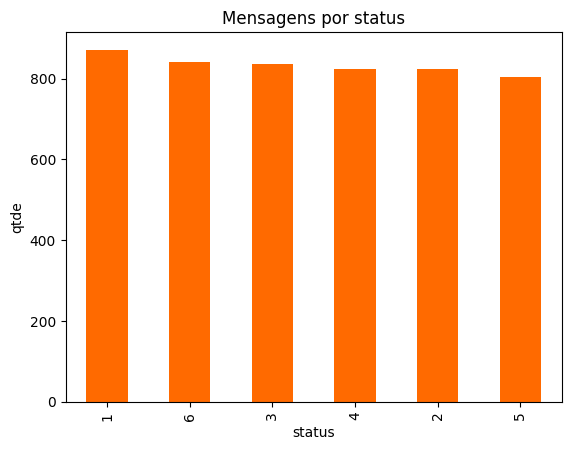

In [15]:
# Quantidade de mensagens por status (enviada, lida, e entre outros.)
if 'status' in campaign_queue.columns:
    s = campaign_queue['status'].value_counts(dropna=False)
    s.plot(kind='bar', color='#FF6A00', title='Mensagens por status')
    plt.xlabel('status'); plt.ylabel('qtde'); plt.show()

## Pedidos (Order)

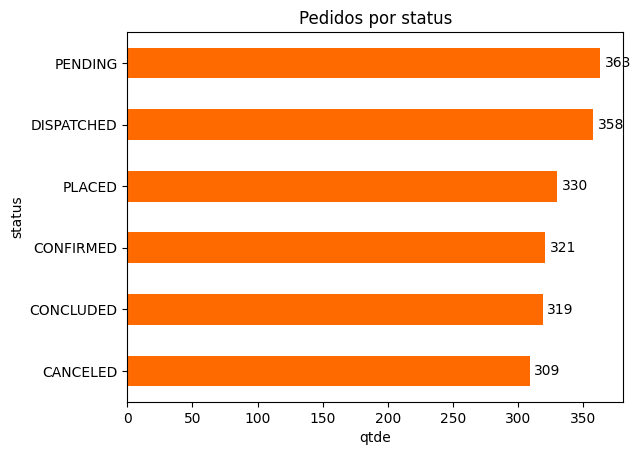

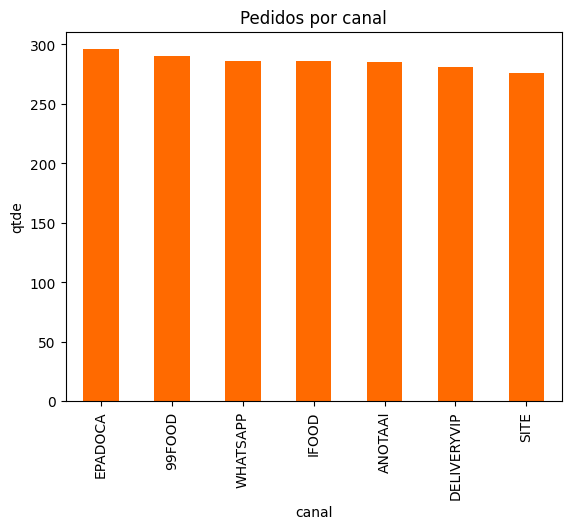

In [16]:
# Mostra quantos pedidos estão em cada status
if 'status' in order.columns:
    s = order['status'].value_counts(dropna=False).sort_values()
    ax = s.plot(kind='barh', color="#FF6A00", title="Pedidos por status")
    for i, v in enumerate(s.values):
        ax.text(v + max(s.values)*0.01, i, str(v), va='center')
    plt.xlabel('qtde'); plt.ylabel('status')
    plt.show()

print("\n\n")

# Mostra em quais canais os pedidos foram feitos
if 'salesChannel' in order.columns:
    s = order['salesChannel'].value_counts(dropna=False)
    s.plot(kind='bar', color='#FF6A00', title='Pedidos por canal')
    plt.xlabel('canal'); plt.ylabel('qtde'); plt.show()

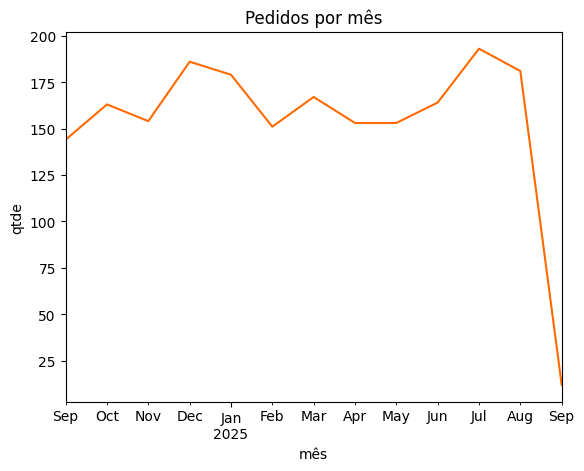

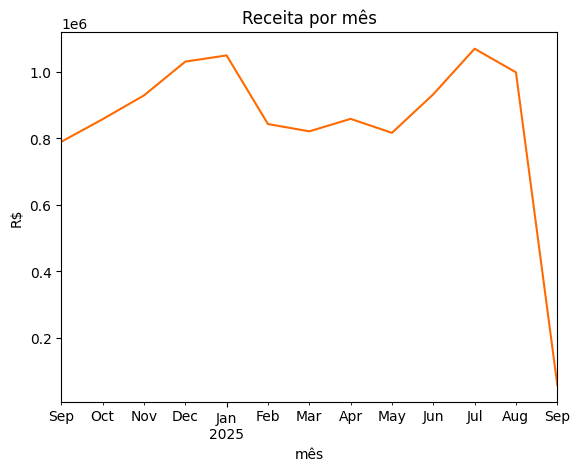

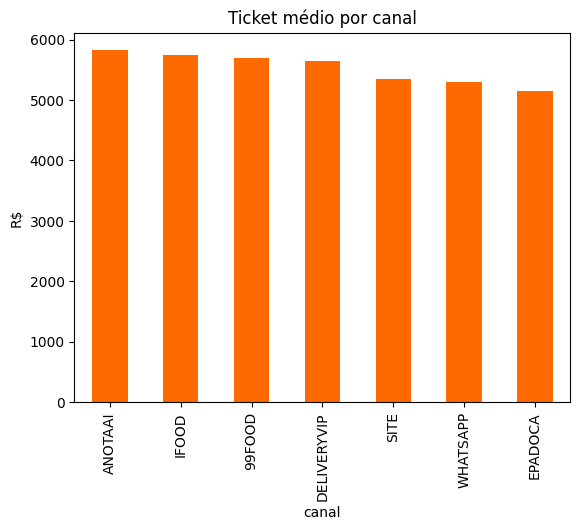

In [17]:
# Mostra quantos pedidos foram feitos a cada mês
if 'createdAt' in order.columns:
    order['_createdAt'] = pd.to_datetime(order['createdAt'], errors='coerce', dayfirst=True)
    order.set_index('_createdAt').resample('ME').size().plot(color='#FF6A00', title='Pedidos por mês')
    plt.xlabel('mês'); plt.ylabel('qtde'); plt.show()

print("\n\n")

# Mostra o valor da receita geradas por mês
if 'totalAmount' in order.columns:
    order['totalAmount_num'] = pd.to_numeric(order['totalAmount'].astype(str).str.replace('.', '', regex=False).str.replace(',', '.', regex=False), errors='coerce')
elif 'total' in order.columns:
    order['totalAmount_num'] = pd.to_numeric(order['total'].astype(str).str.replace('.', '', regex=False).str.replace(',', '.', regex=False), errors='coerce')
else:
    order['totalAmount_num'] = np.nan

if order.get('_createdAt') is not None and order['_createdAt'].notna().any() and order['totalAmount_num'].notna().any():
    order.set_index('_createdAt').resample('ME')['totalAmount_num'].sum().plot(color='#FF6A00', title='Receita por mês')
    plt.xlabel('mês'); plt.ylabel('R$'); plt.show()

print("\n\n")

# Mostra o valor médio dos pedidos em cada canal (ticket médio)
if {'salesChannel','totalAmount_num'}.issubset(order.columns):
    ticket = order.groupby('salesChannel')['totalAmount_num'].mean().sort_values(ascending=False)
    ticket.plot(kind='bar', color='#FF6A00', title='Ticket médio por canal')
    plt.xlabel('canal'); plt.ylabel('R$'); plt.show()